In [36]:
#Importing the required Libraries.

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
#Extracting the data from YahooFinance database.
df = yf.download('GOOG','2008-01-01','2018-01-01')

[*********************100%%**********************]  1 of 1 completed


In [38]:
#Checking the first few rows of the dataset.
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,17.257067,17.369146,16.879980,17.065783,17.065783,172921733
2008-01-03,17.067528,17.107128,16.849842,17.069269,17.069269,130587647
2008-01-04,16.928797,16.960428,16.313852,16.363665,16.363665,215195594
2008-01-07,16.287451,16.495173,15.874249,16.170637,16.170637,257096061
2008-01-08,16.264038,16.437389,15.716092,15.733029,15.733029,214364490


In [39]:
#Checking the bottom rows of the dataset
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-22,53.055500,53.209999,52.972000,53.006001,53.006001,15102000
2017-12-26,52.903500,53.006001,52.509998,52.837002,52.837002,15212000
2017-12-27,52.869499,52.918499,52.402500,52.468498,52.468498,25438000
2017-12-28,52.580002,52.737499,52.238499,52.407001,52.407001,16742000
2017-12-29,52.335999,52.485001,52.244999,52.320000,52.320000,17750000


In [40]:
#Shape of the dataset
df.shape

(2518, 6)

This dataset contains 2518 rows with 6 columns.

In [41]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no null values in the dataset.


Since our main focus is on the Closing Price from here we will be dealing with the Closing Price column of the dataset.

In [42]:
df['Close'].describe()

count    2518.000000
mean       22.934663
std        11.676033
min         6.411966
25%        13.520821
50%        18.546234
75%        29.976204
max        53.856998
Name: Close, dtype: float64

Plot of the Closing Price of Google.

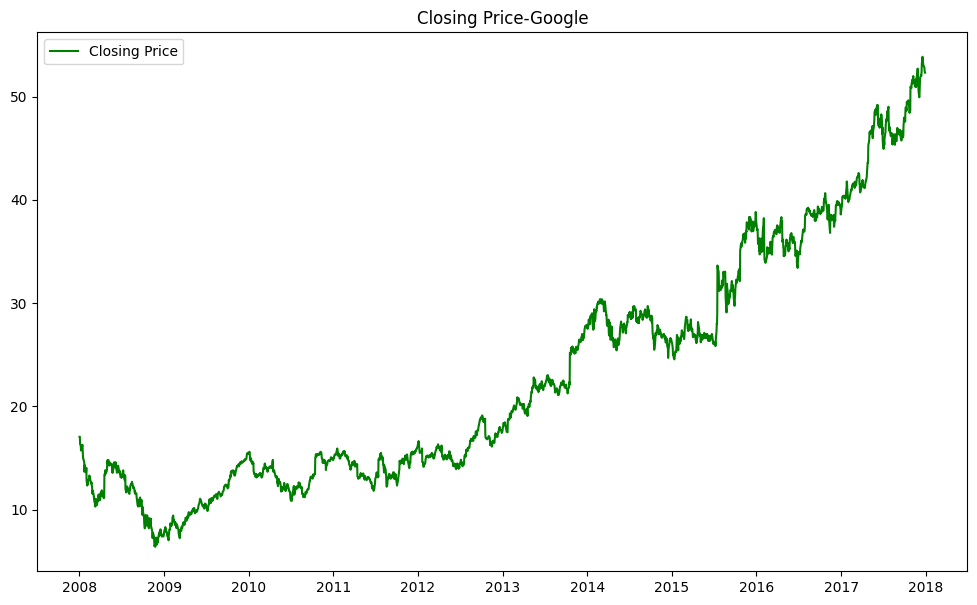

In [43]:
#Using Matplotlib Library
plt.figure(figsize=(12,7))
plt.plot(df['Close'],label='Closing Price',color='green')
plt.legend()
plt.title('Closing Price-Google')
plt.show()

In [44]:
df1 = df.reset_index()['Close']         #reset_index
df1

0       17.065783
1       17.069269
2       16.363665
3       16.170637
4       15.733029
          ...    
2513    53.006001
2514    52.837002
2515    52.468498
2516    52.407001
2517    52.320000
Name: Close, Length: 2518, dtype: float64

In [45]:
type(df1)

pandas.core.series.Series

In [46]:
data = df1.values
data

array([17.06578255, 17.06926918, 16.36366463, ..., 52.46849823,
       52.4070015 , 52.31999969])

Feature Scaling                
for stable and efficient training

In [47]:
data_min = data.min()
data_max = data.max()

Here we are normalizing the data in the way that the entire data range lies in between 0 and 1.

In [48]:
normalized_data = (data-data_min)/(data_max-data_min)                            #MinMaxScaling

normalized_data

array([0.22455073, 0.22462422, 0.20975217, ..., 0.97073455, 0.96943838,
       0.96760464])

Splitting the data into training and testing sets

Here we will not be using train_test_split function because we will be splitting the data according to the date.

In [49]:
len_training_data = int(len(data)*0.8)                       #using a 80-20 split
len_testing_data = len(data)-len_training_data+150

print("Length of the training data ", len_training_data)
print("Length of the testing data ", len_testing_data)

Length of the training data  2014
Length of the testing data  654


In [50]:
normalized_data = normalized_data.reshape(-1,1)
normalized_data

array([[0.22455073],
       [0.22462422],
       [0.20975217],
       ...,
       [0.97073455],
       [0.96943838],
       [0.96760464]])

In [51]:
normalized_data.shape

(2518, 1)

In [52]:
train_data = normalized_data[:len_training_data,:]
test_data = normalized_data[len_training_data-150:len(normalized_data),:]

print("Shape of train data ",train_data.shape)
print("Shape of test data ",test_data.shape)
print("Type of train data ", type(train_data))
print("Type of test data ", type(test_data))

Shape of train data  (2014, 1)
Shape of test data  (654, 1)
Type of train data  <class 'numpy.ndarray'>
Type of test data  <class 'numpy.ndarray'>


Now, I made two lists named x_train and y_train. The values will be appended in the following way :
Firstly, we define a variable prev_data which was given a value of 150, the use of this variable is for predicting the stock price we need to give preceeding data to the model which then gives us 1 succeedding stock price.

For this reason I am giving 150 previous data to the model for predicting the output of the 151th day.
All the 150 previous data will go to the x_train list and the next day data will go into y_train as an individual, this y_train will be helpful for validating our prediction.

In [53]:
x_train=[]
y_train=[]
prev_data = 150
for i in range(len_training_data-prev_data):
  x_train.append(train_data[i:i+prev_data,:])
  y_train.append(train_data[i+prev_data,:])




In [54]:
len(x_train[0])

150

In [55]:
X_train = np.array(x_train)
X_train.shape

(1864, 150, 1)

In [56]:
Y_train = np.array(y_train)
Y_train.shape

(1864, 1)

Following the same as done for x_train and y_train in the case of x_test and y_test.

In [57]:
x_test = []
y_test = []

prev_data = 150
for i in range(len_testing_data-prev_data):
  x_test.append(test_data[i:i+prev_data,:])
  y_test.append(test_data[i+prev_data,:])

In [58]:
len(x_test)

504

In [59]:
X_test = np.array(x_test)
Y_test = np.array(y_test)
X_test.shape

(504, 150, 1)

Building the model

In [60]:
#Importing Libraries

import tensorflow as tf
import keras as keras
from keras.models import Sequential
from keras.layers import LSTM,Dense
import math
import time
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [61]:
model = Sequential()

model.add(LSTM(25,return_sequences=True,input_shape=(X_train.shape[1],1),activation='relu'))
model.add(LSTM(15,return_sequences=False,activation='relu'))
model.add(Dense(1))                 #not adding a activation function to the output layer is a good way of building the model.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),loss='mean_squared_error')

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 150, 25)           2700      
                                                                 
 lstm_3 (LSTM)               (None, 15)                2460      
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 5176 (20.22 KB)
Trainable params: 5176 (20.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
batch_size=128
epochs=100
start_time = time.time()
model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test))
stop_time = time.time()

time_taken = stop_time - start_time    #this gives us the total time taken for successfully training the model.
print("Time taken : ", time_taken)

Epoch 1/100
15/15 [==============================] - 6s 171ms/step - loss: 0.0152 - val_loss: 0.0157
Epoch 2/100
15/15 [==============================] - 2s 133ms/step - loss: 7.6533e-04 - val_loss: 0.0015
Epoch 3/100
15/15 [==============================] - 2s 145ms/step - loss: 2.8651e-04 - val_loss: 5.6995e-04
Epoch 4/100
15/15 [==============================] - 2s 133ms/step - loss: 2.1889e-04 - val_loss: 4.2676e-04
Epoch 5/100
15/15 [==============================] - 2s 162ms/step - loss: 1.9303e-04 - val_loss: 0.0014
Epoch 6/100
15/15 [==============================] - 2s 163ms/step - loss: 2.3187e-04 - val_loss: 0.0011
Epoch 7/100
15/15 [==============================] - 2s 125ms/step - loss: 1.9967e-04 - val_loss: 5.9088e-04
Epoch 8/100
15/15 [==============================] - 2s 125ms/step - loss: 1.9268e-04 - val_loss: 3.5344e-04
Epoch 9/100
15/15 [==============================] - 2s 127ms/step - loss: 1.7346e-04 - val_loss: 3.5301e-04
Epoch 10/100
15/15 [===================

In [64]:
train_predict = model.predict(X_train)   #Predicting the values of Y_test.
test_predict = model.predict(X_test)     #Predicting the values of X_test

16/16 [==============================] - 0s 23ms/step


In [65]:
train_predict

array([[0.11535631],
       [0.1195236 ],
       [0.11999148],
       ...,
       [0.6618866 ],
       [0.6770622 ],
       [0.69050664]], dtype=float32)

In [66]:
Predicted_Train = train_predict*(data_max-data_min) + data_min     #Scaling the data.

In [67]:
Predicted_Train.shape

(1864, 1)

In [68]:
Y_train_inv = Y_train*(data_max-data_min) + data_min    #Rescaling the data to make it original
Y_train_inv

array([[12.11309719],
       [11.93327141],
       [12.32903767],
       ...,
       [38.12549973],
       [38.83000183],
       [38.54999924]])

In [69]:
rmse = math.sqrt(mean_squared_error(Y_train_inv,Predicted_Train))
print("Root Mean Square Error of training data : ", rmse)

Root Mean Square Error of training data :  0.39786187756862834


In [70]:
##rmse_1 = math.sqrt(mean_squared_error(Y_train_inv, train_predict))
##rmse_1

In [71]:
mae = mean_absolute_error(Y_train_inv,Predicted_Train)
print("Mean Absolute Error of training data : ", mae)

Mean Absolute Error of training data :  0.2864087469588022


In [72]:
r2 = r2_score(Y_train_inv,Predicted_Train)
print("R2 score of training data : ", r2)

R2 score of training data :  0.997167435415589


In [73]:
Predicted_Test = test_predict*(data_max-data_min) + data_min

Ytest_inv = Y_test*(data_max-data_min) + data_min

In [74]:
Predicted_Test.shape

(504, 1)

In [75]:
rmse_test = math.sqrt(mean_squared_error(Ytest_inv,Predicted_Test))
print("Root Mean Square Error of testing data : ", rmse_test)

Root Mean Square Error of testing data :  0.5983212605605658


In [76]:
mae_test = mean_absolute_error(Ytest_inv,Predicted_Test)
print("Mean Absolute Error of testing data : ", mae_test)

Mean Absolute Error of testing data :  0.46038504252358087


In [77]:
r2_test = r2_score(Ytest_inv,Predicted_Test)
print("R2 score of testing data : ", r2_test)

R2 score of testing data :  0.9875397018790357


In [78]:
print("Time taken to run the model : ", round(time_taken,4))
print("RMSE-TRAIN : ",rmse)
print("MAE-TRAIN : ", mae)
print("R2score TRAIN : ", r2)
print("RMSE - TEST : ",rmse_test)
print("MAE - TEST", mae_test)
print("R2score TEST : ", r2_test)

Time taken to run the model :  265.7746
RMSE-TRAIN :  0.39786187756862834
MAE-TRAIN :  0.2864087469588022
R2score TRAIN :  0.997167435415589
RMSE - TEST :  0.5983212605605658
MAE - TEST 0.46038504252358087
R2score TEST :  0.9875397018790357


Plotting

Here we can't directly usthe available data directly in the plt.plot() function because each is having different index and the predicted data start at different points. So we should make them alike and the plot.

In [79]:
Ytest_inv.shape

(504, 1)

In [80]:
comparison = pd.DataFrame(Predicted_Test,columns=['Predicted Price'])

In [81]:
comparison.insert(1,"Orginal Price",Ytest_inv)
comparison

,Predicted Price,Orginal Price
0,38.767849,37.944000
1,38.178318,37.091999
2,37.407669,37.129002
3,37.567200,37.181000
4,37.658657,36.319500
...,...,...
499,52.425808,53.006001
500,52.228222,52.837002
501,52.099201,52.468498
502,51.708168,52.407001


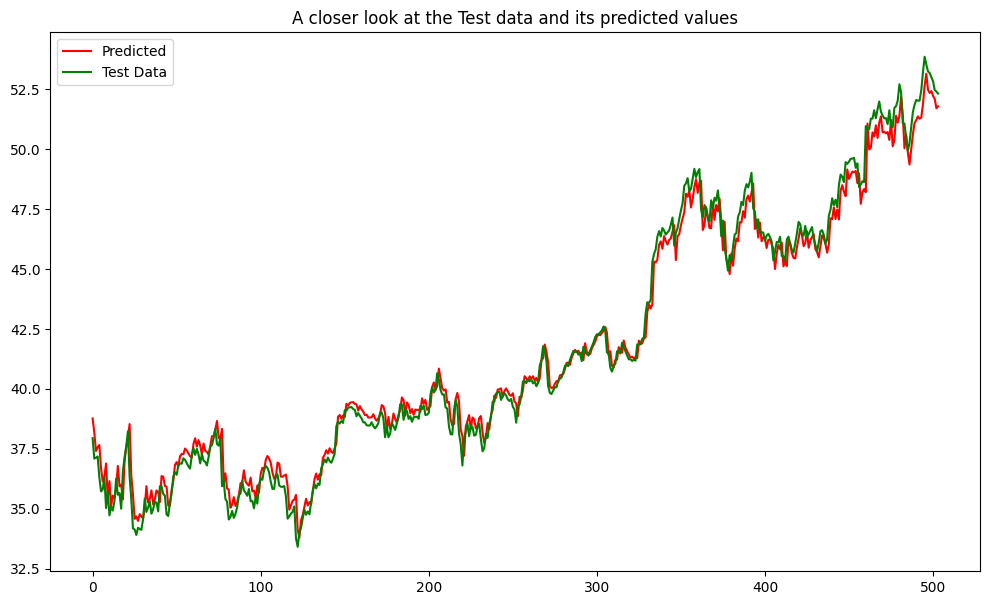

In [82]:
plt.figure(figsize=(12,7))
plt.plot(comparison['Predicted Price'],label='Predicted',color='r')
plt.plot(comparison['Orginal Price'],label='Test Data',color='g')
plt.legend()
plt.title("A closer look at the Test data and its predicted values")
plt.show()

In [83]:
Predicted_Train.shape

(1864, 1)

In [84]:
len_training_data-prev_data

1864

Below, I made an array in such a way that it contains same number of datapoints as the original data, and added the training datapoints in their respective position, and left all other datapoints as nan values. SImilarly i repeated the same with the testing points, so that i could compare my stock prices using a plot.

In [85]:
original_data = data.reshape(-1,1)

train_plot = np.empty_like(original_data)
train_plot[:,:] = np.nan
train_plot[prev_data:len_training_data,:] = Predicted_Train
train_plot

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [86]:
test_plot = np.empty_like(original_data)
test_plot[:,:] = np.nan
test_plot[len_training_data:,:] = Predicted_Test

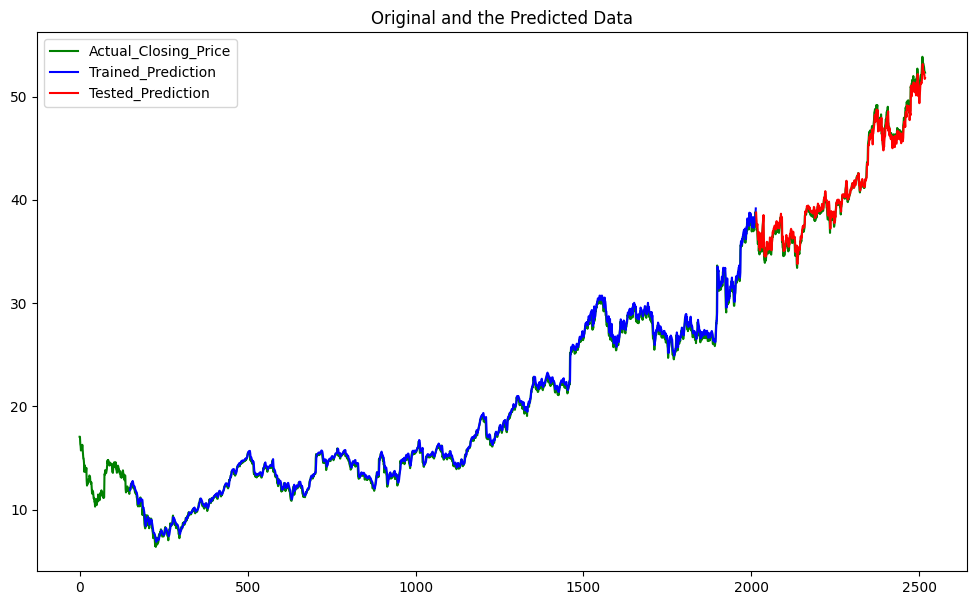

In [87]:
plt.figure(figsize=(12,7))
plt.plot(original_data,label='Actual_Closing_Price',color='g')
plt.plot(train_plot,label='Trained_Prediction',color='b')
plt.plot(test_plot,label='Tested_Prediction',color='r')
plt.legend()
plt.title("Original and the Predicted Data")
plt.show()

The above plot shows that the predictions were almost close with the original prices.
Hence we can use LSTM model for building a stock price prediction model which produces the prices with high precision.